<a href="https://colab.research.google.com/github/Deyonrose/labexercises/blob/main/2348513_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori, association_rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data=pd.read_csv('/content/Market_Basket_Optimisation.csv', header=None);

In [ ]:
data.shape

(7501, 20)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe

<bound method NDFrame.describe of                  0                  1            2                 3   \
0            shrimp            almonds      avocado    vegetables mix   
1           burgers          meatballs         eggs               NaN   
2           chutney                NaN          NaN               NaN   
3            turkey            avocado          NaN               NaN   
4     mineral water               milk   energy bar  whole wheat rice   
...             ...                ...          ...               ...   
7496         butter         light mayo  fresh bread               NaN   
7497        burgers  frozen vegetables         eggs      french fries   
7498        chicken                NaN          NaN               NaN   
7499       escalope          green tea          NaN               NaN   
7500           eggs    frozen smoothie  yogurt cake    low fat yogurt   

                4                 5     6               7             8   \
0     green g

In [ ]:
print(data.isnull().sum())

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64


In [ ]:
transactions = []
for row in data.iterrows():
    transaction = [item for item in row[1] if pd.notna(item)]
    transactions.append(transaction)


In [ ]:
transactions = []
for i in range(data.shape[0]):
    transaction = []
    for j in range(data.shape[1]):
        if pd.notna(data.iloc[i, j]):
            transaction.append(data.iloc[i, j])
    transactions.append(transaction)
    print(transaction)

Streaming output truncated to the last 5000 lines.
['cake']
['cereals']
['escalope', 'pasta', 'mushroom cream sauce']
['olive oil', 'light mayo']
['cottage cheese']
['herb & pepper', 'ground beef', 'champagne', 'green tea']
['hot dogs']
['spaghetti', 'french fries', 'energy drink']
['ham', 'shrimp', 'ground beef', 'mineral water', 'avocado', 'milk', 'brownies', 'protein bar']
['mineral water', 'almonds', 'cottage cheese', 'light mayo']
['protein bar']
['red wine', 'candy bars']
['mineral water', 'avocado', 'milk', 'almonds', 'eggs', 'french fries', 'melons']
['herb & pepper']
['vegetables mix', 'escalope']
['tomatoes', 'milk']
['milk', 'salmon']
['eggs']
['mineral water', 'vegetables mix', 'rice', 'light mayo']
['vegetables mix']
['muffins', 'cookies', 'green tea']
['grated cheese', 'spinach', 'eggs', 'cooking oil', 'green tea', 'salad']
['strawberries']
['mineral water', 'cake', 'chicken', 'french fries', 'tomato juice']
['mineral water', 'cereals']
['chocolate', 'french fries']
['bur

In [ ]:
all_items = sorted(set(item for transaction in transactions for item in transaction))


In [ ]:
all_items = set(item for transaction in transactions for item in transaction)
binary_data = {}
for idx, transaction in enumerate(transactions):
    for item in all_items:
        if item in transaction:
            if item not in binary_data:
                binary_data[item] = [0] * len(transactions)
            binary_data[item][idx] = 1
binary_df = pd.DataFrame(binary_data)
print(binary_df)

      green grapes  olive oil  green tea  frozen smoothie  salad  honey  \
0                1          1          1                1      1      1   
1                0          0          0                0      0      0   
2                0          0          0                0      0      0   
3                0          0          0                0      0      0   
4                0          0          1                0      0      0   
...            ...        ...        ...              ...    ...    ...   
7496             0          0          0                0      0      0   
7497             0          0          1                0      0      0   
7498             0          0          0                0      0      0   
7499             0          0          1                0      0      0   
7500             0          0          0                1      0      0   

      salmon  almonds  shrimp  low fat yogurt  ...  melons  cauliflower  \
0          1        1   

In [ ]:
binary_df.isnull().sum()

green grapes       0
olive oil          0
green tea          0
frozen smoothie    0
salad              0
                  ..
burger sauce       0
oatmeal            0
 asparagus         0
cream              0
napkins            0
Length: 120, dtype: int64

In [ ]:
item_counts = data.stack().value_counts()
print("Top 10 most frequent items:")
print(item_counts.head(10))


Top 10 most frequent items:
mineral water        1788
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1230
green tea             991
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
dtype: int64


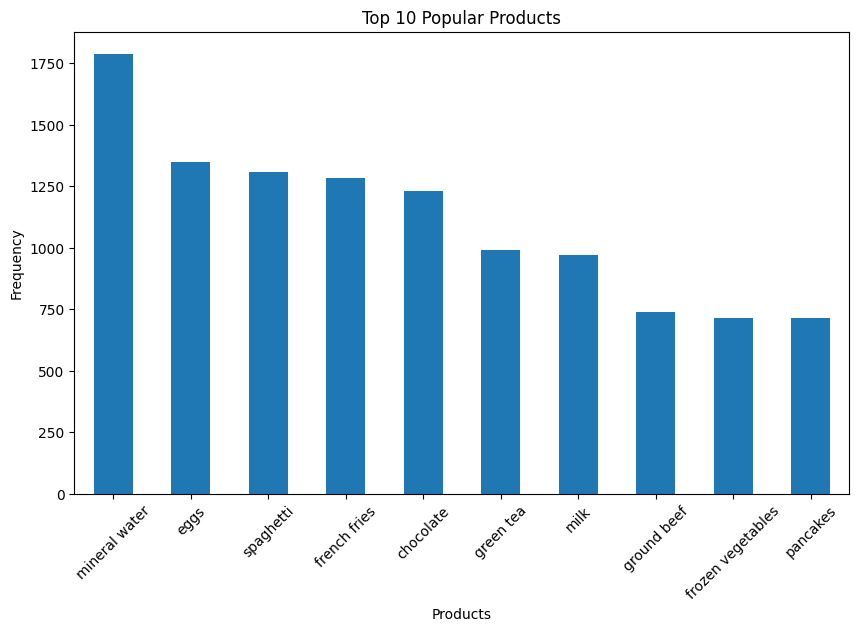

In [ ]:
#EDA Product Popularity Analysis
item_frequencies = data.stack().value_counts()
plt.figure(figsize=(10, 6))
item_frequencies[:10].plot(kind='bar')
plt.title('Top 10 Popular Products')
plt.xlabel('Products')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

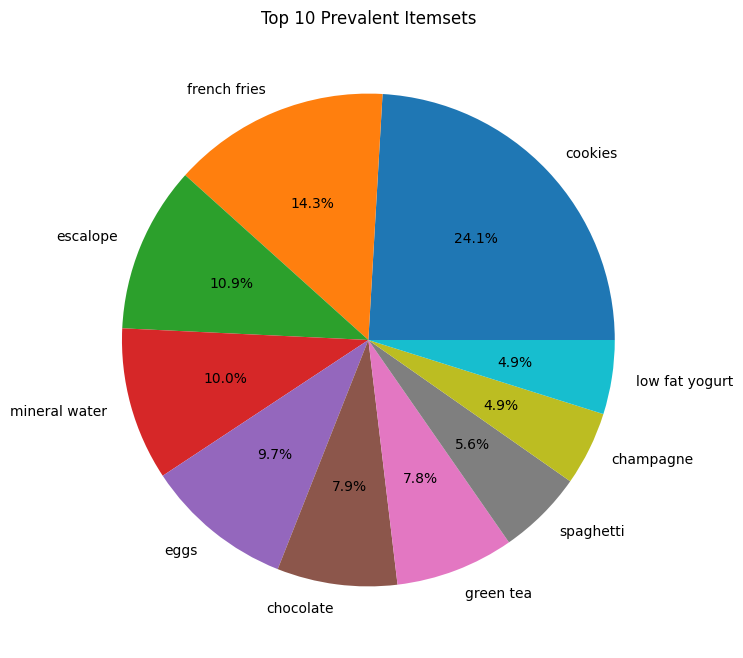

In [ ]:
#Repeated items analysis
itemset_frequencies = data.apply(lambda row: ','.join(row.dropna()), axis=1).value_counts()
plt.figure(figsize=(8, 8))
itemset_frequencies[:10].plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Prevalent Itemsets')
plt.ylabel('')
plt.show()

In [ ]:
rules.pivot_table(index='antecedents', columns='consequents', values='support')[:10]

consequents,(1),"(6, 7)","(3, 4, 5, 6)","(3, 4, 5, 7)","(3, 4, 6, 7)","(3, 5, 6, 7)","(4, 5, 6, 7)","(1, 2, 3, 4, 5)","(0, 2, 3, 4, 5)","(0, 1, 3, 4, 5)",...,"(3, 5, 7)","(3, 6, 7)","(4, 5, 6)","(4, 5, 7)","(4, 6, 7)","(5, 6, 7)","(1, 2, 3, 4)","(0, 2, 3, 4)","(0, 1, 2, 4)","(0, 1, 2, 3, 4, 5, 6)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(0),0.766165,0.130783,0.182509,0.130783,0.130783,0.130783,0.130783,0.248500,NaN,NaN,...,0.130783,0.130783,0.182509,0.130783,0.130783,0.130783,0.337155,NaN,NaN,NaN
"(3, 4, 6, 7)",0.130783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3, 5, 6, 7)",0.130783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130783,NaN
"(4, 5, 6, 7)",0.130783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0, 1, 2, 3, 4)",NaN,0.130783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.130783,NaN,NaN,NaN,NaN
"(0, 1, 2, 3, 5)",NaN,0.130783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.130783,NaN,NaN,NaN,NaN,NaN
(6),0.182509,NaN,NaN,0.130783,NaN,NaN,NaN,0.182509,0.182509,0.182509,...,0.130783,NaN,NaN,0.130783,NaN,NaN,0.182509,0.182509,0.182509,NaN
"(0, 1, 2, 4, 5)",NaN,0.130783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.130783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0, 1, 3, 4, 5)",NaN,0.130783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


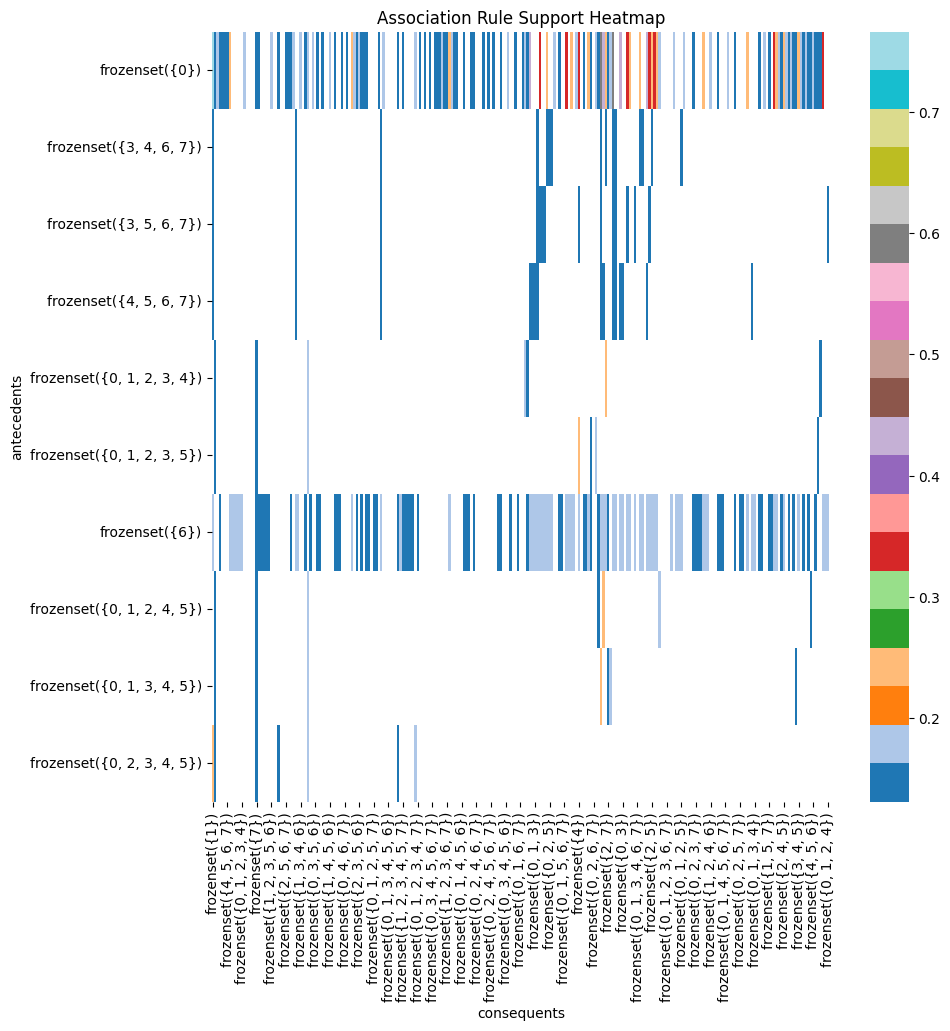

In [ ]:
# Perform Apriori algorithm
binary_data = data.applymap(lambda x: 1 if pd.notna(x) else 0)

# Perform Apriori algorithm
frequent_itemsets = apriori(binary_data, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Create a heatmap for association rule support and confidence
plt.figure(figsize=(10,10))
sns.heatmap(data=rules.pivot_table(index='antecedents', columns='consequents', values='support')[:10], annot=False, cmap='tab20')
plt.title('Association Rule Support Heatmap')
plt.show()
